In [69]:
import matplotlib as mlib
import matplotlib.pyplot as plt
from random import *
import numpy as np

In [70]:
#Fonction d'affichage de la grille - cette partie est fournie à l'étudiant.

def plot_colored_grid(data, colors=['white', 'green'], bounds=[0, 0.5, 1], grid=True, labels=False, frame=True):
    # create discrete colormap
    cmap = mlib.colors.ListedColormap(colors)
    norm = mlib.colors.BoundaryNorm(bounds, cmap.N)

    # enable or disable frame
    plt.figure(frameon=frame)

    # show grid
    if grid:
        plt.grid(axis='both', color='k', linewidth=2) 
        plt.xticks(np.arange(0.5, data.shape[1], 1))  # correct grid sizes
        plt.yticks(np.arange(0.5, data.shape[0], 1))

    # disable labels
    if not labels:
        plt.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False) 
    # plot data matrix
    plt.imshow(data, cmap=cmap, norm=norm)

    # display main axis 
    plt.show()

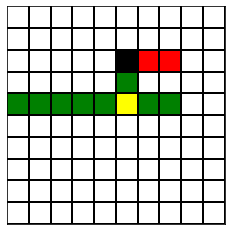

In [88]:
data = np.zeros((10, 10))

#Fonction simulateur - à faire par les étudiants.

def simulateur (N_proton, N_muon, N_pion) : 
    L_short = 3
    L_long = 8

    E_low = 1
    E_high = 3
    
    ###Simulation des protons
    for k in range (N_proton) : 
        n = random()                     #Tirage de la direction de propagation
        if n < 0.5 : direction = 0       #Direction horizontale
        else : direction = 1             #Direction vertical
        
        if direction == 0 : 
            x = randint (0, 6)           #Tirage de la position initiale
            y = randint(0, 9)
            for i in range (L_short) : 
                data[x+i, y] += E_high

        if direction == 1 : 
            x = randint (0, 9)           #Tirage de la position initiale
            y = randint(0, 6)
            for i in range (L_short) : 
                data[x, y+i] += E_high
                
    ###Simulation des muons
    for k in range (N_muon) : 
        n = random()                     #Tirage de la direction de propagation
        if n < 0.5 : direction = 0       #Direction horizontale
        else : direction = 1             #Direction vertical
        
        if direction == 0 : 
            x = randint (0, 2)           #Tirage de la position initiale
            y = randint(0, 9)
            for i in range (L_long) : 
                data[x+i, y] += E_low

        if direction == 1 : 
            x = randint (0, 9)           #Tirage de la position initiale
            y = randint(0, 2)
            for i in range (L_long) : 
                data[x, y+i] += E_low

    ###Simulation des pions
    for k in range (N_pion) : 
        n = random()                     #Tirage de la direction de propagation
        if n < 0.5 : direction = 0       #Direction horizontale
        else : direction = 1             #Direction vertical
        
        if direction == 0 : 
            x = randint (0, 6)           #Tirage de la position initiale
            y = randint(0, 9)
            for i in range (L_short) : 
                data[x+i, y] += E_low

        if direction == 1 : 
            x = randint (0, 9)           #Tirage de la position initiale
            y = randint(0, 6)
            for i in range (L_short) : 
                data[x, y+i] += E_low

    return

simulateur (1,1,1) #Execution de la simulation avec 1 proton, 1 muon et 1 pion


##Affichage du détecteur avec les traces (ligne fournie aux étudiants)
plot_colored_grid(data, colors=['white', 'green', 'yellow', 'red', 'black'], bounds=[0, 0.5, 1.5, 2.5, 3.5, 100])

In [89]:
###Identification de particules

Horiz_low = 0    #Initialisation des variables
Horiz_high = 0
Vert_low = 0
Vert_high = 0

I_low = 0
J_high = 0

for i in range (len(data[0])) :
    
    ###SCAN HORIZONTAL
    for j in range (len(data[0])) : 

        if (data[i,j] == 1 or data[i,j] == 2 or data[i,j] == 4) :  #Teste quelle quantité d'énergie est dans la case - Ici les 
            Horiz_low += 1                                         #quantités d'interêt sont celles des particules 
            if Horiz_low == 1 :                                    #peu énergétiques (muons et pions)
                I_low = i         
                J_low = j    #Relève les coordonnées du début du dépot d'énergie sur la ligne

        if (data[i,j] == 3 or data[i,j] == 4) :  #On s'intéresse cette fois aux protons
            Horiz_high += 1
            if Horiz_high == 1 :
                I_high = i
                J_high = j

    if Horiz_low == 3 : print ("Un pion a été détecté en (", I_low, ",", J_low, ") et s'est propagé horizontalement.")
    if Horiz_low == 8 : print ("Un muon a été détecté en (", I_low, ",", J_low, ") et s'est propagé horizontalement.")
    if Horiz_high == 3 : print ("Un proton a été détecté en (", I_high, ",", J_high, ") et s'est propagé horizontalement.")
    
    Horiz_low = 0
    Horiz_high = 0


    ###SCAN VERTICAL - J'ai ici simplement interverti les variable i et j dans les lignes de commandes, le reste est identique.
    for j in range (len(data[0])) : 

        if (data[j,i] == 1 or data[j,i] == 2 or data[j,i] == 4) :  
            Vert_low += 1
            if Vert_low == 1 :
                I_low = j
                J_low = i

        if (data[j,i] == 3 or data[j,i] == 4) :  
            Vert_high += 1
            if Vert_high == 1 :
                I_high = j
                J_high = i

            
    if Vert_low == 3 : print ("Un pion a été détecté en (", I_low, ",", J_low, ") et s'est propagé verticalement.")
    if Vert_low == 8 : print ("Un muon a été détecté en (", I_low, ",", J_low, ") et s'est propagé verticalement.")
    if Vert_high == 3 : print ("Un proton a été détecté en (", I_high, ",", J_high, ") et s'est propagé verticalement.")
    
    Vert_low = 0
    Vert_high = 0

    
        

Un proton a été détecté en ( 2 , 5 ) et s'est propagé horizontalement.
Un muon a été détecté en ( 4 , 0 ) et s'est propagé horizontalement.
Un pion a été détecté en ( 2 , 5 ) et s'est propagé verticalement.
